In [1]:
%%capture
import sys
from collections import Counter
sys.path.insert(0, '../../bomberman')
sys.path.insert(1, '..')
import pygame
import random
from game import Game
from monsters.stupid_monster import StupidMonster
from monsters.selfpreserving_monster import SelfPreservingMonster
sys.path.insert(1, '../groupNN')
from approxqcharacter import ApproxQCharacter
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
random.seed(time.time()) # TODO Change this if you want different random choices

In [2]:
%%capture
ev_history = pd.DataFrame(columns=['death_bomb', 'death_monster', 'exited'])
ws_history = pd.DataFrame(columns=['exit-distance', 'monster-distance', 'explosion-distance'])
dbsum, dmsum, esum = 0, 0, 0
total = 0
weights = Counter()
# weights = Counter({'exit-distance': -28657.344739297438, 'monster-distance': -82137.49278128003})
# weights = Counter({'monster-distance': -58236.996651541864, 'exit-distance': 515970.36564830824})
epochs = 300
startedutc = time.time()
for i in range(0, epochs):
    start_time = time.time()
    
    if i % 10 == 0: print(f'{epochs - i} epochs left')
    
    g = Game.fromfile('map.txt')
    g.add_monster(StupidMonster("stupid", "S", 3, 5))
    g.add_monster(SelfPreservingMonster("aggressive", "A", 3, 13, 2))

    ours = ApproxQCharacter("me", "C", 0, 0)
    ours.weights = weights
    g.add_character(ours)

#     g.go(1)
#     colorama.init(autoreset=True)
#     self.display_gui()
#     g.draw()
    while not g.done():
        
        (g.world, g.events) = g.world.next()
#         self.display_gui()
#         g.draw()
        g.world.next_decisions()
        for e in g.world.events:
#             print(e, e.tpe)
            if e.tpe == 2: dbsum += 1
            if e.tpe == 3: dmsum += 1
            if e.tpe == 4: esum += 1
#     colorama.deinit()

    weights = ours.weights

    ev_history = ev_history.append({'death_bomb':dbsum, 'death_monster':dmsum, 'exited':esum}, ignore_index=True)
    ws_history = ws_history.append({'exit-distance':ours.weights['exit-distance'], 'monster-distance':ours.weights['monster-distance'], 'explosion-distance':ours.weights['explosion-distance']}, ignore_index=True)
    end_time = time.time()
    total += end_time - start_time
    avg = total / (i+1)
    print(f"Epoch {i + 1} completed in {round((end_time - start_time), 3)} s, avgerage: {round(avg, 3)} s, \
est. time left: {round((((avg * epochs) - (time.time() - startedutc)) / 60), 3)} m")

TypeError: 'NoneType' object is not subscriptable

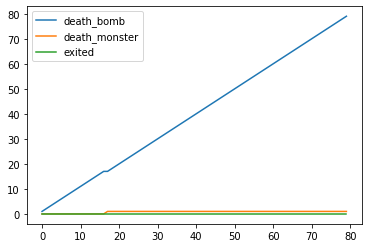

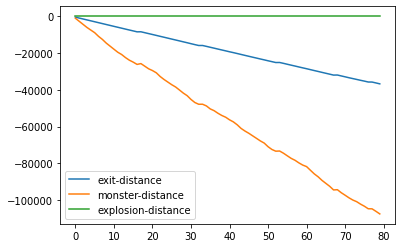

0/300 = 0.0
Counter({'monster_at': -0.010000000000002274, 'bomb_at': -0.01730923128595805, 'expl_at': -10000.010000000002, 'exit-distance': -36667.79610251184, 'monster-distance': -107147.91307773055})


In [3]:
plt.plot(ev_history['death_bomb'], label='death_bomb')
plt.plot(ev_history['death_monster'], label='death_monster')
plt.plot(ev_history['exited'], label='exited')
plt.legend()
plt.show()

plt.plot(ws_history['exit-distance'], label='exit-distance')
plt.plot(ws_history['monster-distance'], label='monster-distance')
plt.plot(ws_history['explosion-distance'], label='explosion-distance')
plt.legend()
plt.show()

print(f"{np.array(ev_history['exited'])[-1]}/{epochs} = {np.array(ev_history['exited'])[-1]/epochs}")
print(ours.weights)